In [1]:
import pandas
import seaborn


## For each algorithm 
1. Load output data
2. Trosform to a feature matrix (by sample)
3. merge all features in one df

### Load Clinical data

In [2]:
clinical = pandas.read_csv('../../../Data/CODEX_CTCL/41467_2021_26974_MOESM3_ESM_-_Objects.csv',index_col=0).loc[:,['FileName','Groups','Patients']].reset_index()
# display(clinical)
# display(clinical.loc[:,['FileName','Groups','Patients']])
Annot = clinical.loc[:,['FileName','Groups','Patients']].drop_duplicates()
Annot.index = Annot['FileName']

display(Annot)

,FileName,Groups,Patients
FileName,,,
reg001,reg001,1,1
reg002,reg002,1,1
reg006,reg006,1,2
reg035,reg035,1,9
reg036,reg036,1,9
...,...,...,...
reg005,reg005,1,2
reg018,reg018,1,5
reg027,reg027,4,7


### HMRF (giotto)

,cell_ID,class,FileName,Patients,cell_type
90488,75984.0,1,reg008,2,tumor cells


FileName,reg001,reg002,reg003,reg004,reg005,reg006,reg007,reg008,reg009,reg010,...,reg061,reg062,reg063,reg064,reg065,reg066,reg067,reg068,reg069,reg070
class,,,,,,,,,,,,,,,,,,,,,
6,0.0,30.0,142.0,0.0,0.0,140.0,1853.0,774.0,0.0,0.0,...,6.0,0.0,0.0,1861.0,0.0,0.0,33.0,245.0,0.0,0.0


,FileName,Groups,Patients
FileName,,,
reg001,"(0.6449826989619377, 0.03206459054209919, 0.26...","(0.9568627450980393, 0.42745098039215684, 0.26...","(0.7633986928104575, 0.1633986928104575, 0.292..."
reg002,"(0.6788158400615149, 0.06958861976163014, 0.27...","(0.9568627450980393, 0.42745098039215684, 0.26...","(0.7633986928104575, 0.1633986928104575, 0.292..."
reg006,"(0.7041906958861976, 0.09773164167627835, 0.27...","(0.9568627450980393, 0.42745098039215684, 0.26...","(0.8758169934640523, 0.3045751633986928, 0.294..."
reg035,"(0.7380238369857748, 0.1352556708958093, 0.286...","(0.9568627450980393, 0.42745098039215684, 0.26...","(0.9568627450980393, 0.42745098039215684, 0.26..."
reg036,"(0.7718569780853518, 0.17277970011534027, 0.29...","(0.9568627450980393, 0.42745098039215684, 0.26...","(0.9568627450980393, 0.42745098039215684, 0.26..."
...,...,...,...
reg005,"(0.24682814302191466, 0.4675893886966551, 0.71...","(0.9568627450980393, 0.42745098039215684, 0.26...","(0.8758169934640523, 0.3045751633986928, 0.294..."
reg018,"(0.27389465590157636, 0.4325259515570934, 0.69...","(0.9568627450980393, 0.42745098039215684, 0.26...","(0.26405228758169935, 0.6091503267973857, 0.70..."
reg027,"(0.300961168781238, 0.3974625144175317, 0.6768...","(0.4, 0.7607843137254902, 0.6470588235294118)","(0.25359477124183005, 0.45882352941176474, 0.7..."


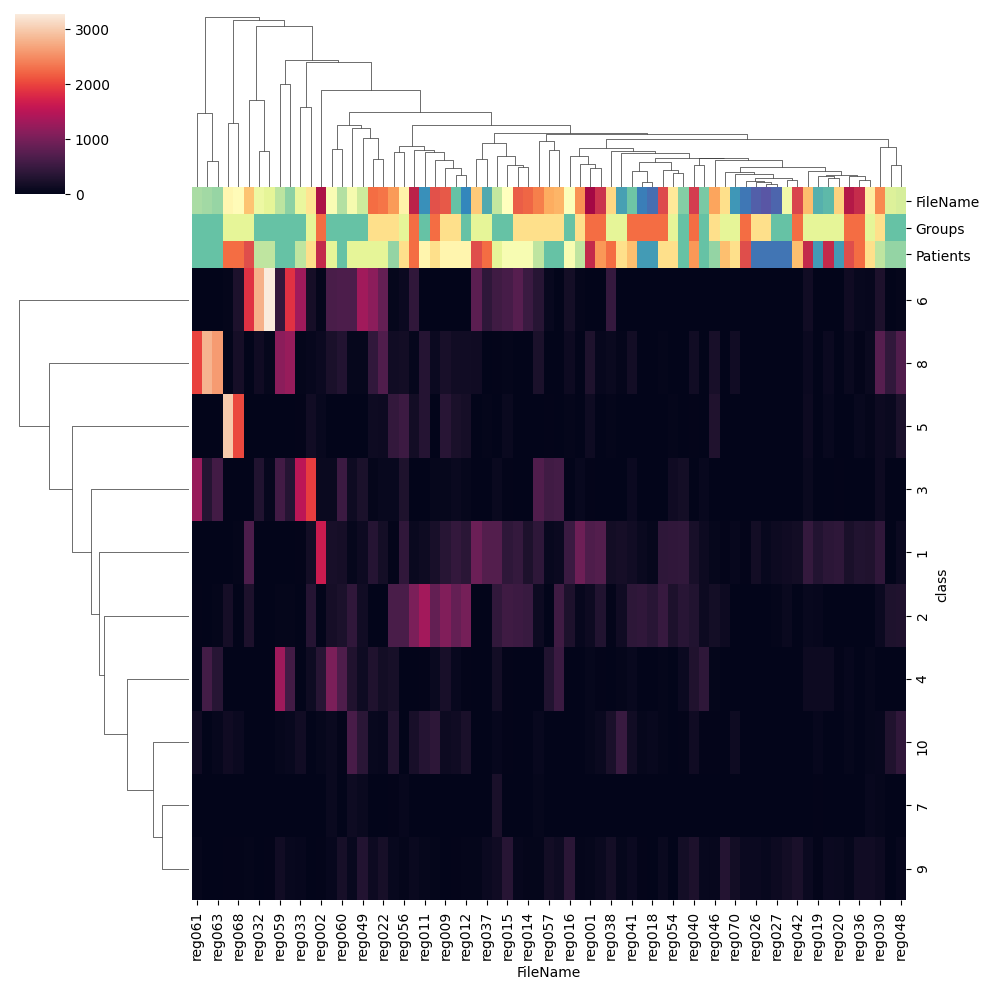

In [3]:
hmrf_df = pandas.read_csv('~/Downloads/hrmf_.csv', index_col=0)

display(hmrf_df.sample())
hmrf = hmrf_df.loc[:,['FileName','class']]
hmrf_count = pandas.DataFrame(hmrf.value_counts().reset_index())
hmrf_count = hmrf_count.pivot_table(index='class', columns='FileName', values = 'count').fillna(0)
display(hmrf_count.sample())


row_colors = pandas.DataFrame(index=Annot.index)

for col in Annot.columns:
    unique_values = Annot[col].unique()
    palette = seaborn.color_palette("Spectral", len(unique_values))
    color_map = dict(zip(unique_values, palette))
    row_colors[col] = Annot[col].map(color_map)

display(row_colors)


seaborn.clustermap(hmrf_count.fillna(0), col_colors=row_colors)

In [4]:
hmrf_count.columns
hmrf_count.index = "HMRF_Niche_" + hmrf_count.index.astype(str)
hmrf_count.head()

FileName,reg001,reg002,reg003,reg004,reg005,reg006,reg007,reg008,reg009,reg010,...,reg061,reg062,reg063,reg064,reg065,reg066,reg067,reg068,reg069,reg070
class,,,,,,,,,,,,,,,,,,,,,
HMRF_Niche_1,666.0,1636.0,449.0,376.0,14.0,225.0,651.0,902.0,334.0,440.0,...,0.0,0.0,0.0,11.0,430.0,107.0,0.0,33.0,189.0,53.0
HMRF_Niche_2,104.0,6.0,73.0,0.0,0.0,0.0,248.0,0.0,1061.0,845.0,...,24.0,0.0,34.0,30.0,355.0,114.0,183.0,0.0,137.0,0.0
HMRF_Niche_3,16.0,79.0,78.0,0.0,0.0,7.0,0.0,0.0,39.0,87.0,...,1238.0,312.0,569.0,320.0,175.0,64.0,0.0,0.0,0.0,3.0
HMRF_Niche_4,45.0,334.0,108.0,105.0,0.0,53.0,0.0,0.0,213.0,67.0,...,7.0,575.0,338.0,563.0,90.0,407.0,0.0,0.0,28.0,0.0
HMRF_Niche_5,117.0,74.0,105.0,68.0,0.0,0.0,7.0,0.0,345.0,226.0,...,0.0,0.0,0.0,11.0,0.0,0.0,2981.0,2023.0,8.0,2.0


### Combine all data

In [5]:

import pandas as pd

df_combined = hmrf_count
# df_combined.dropna(axis=0)
# df_combined.to_csv('../../../Data/CODEX_CTCL/combined_df.csv')

In [6]:
df_combined

FileName,reg001,reg002,reg003,reg004,reg005,reg006,reg007,reg008,reg009,reg010,...,reg061,reg062,reg063,reg064,reg065,reg066,reg067,reg068,reg069,reg070
class,,,,,,,,,,,,,,,,,,,,,
HMRF_Niche_1,666.0,1636.0,449.0,376.0,14.0,225.0,651.0,902.0,334.0,440.0,...,0.0,0.0,0.0,11.0,430.0,107.0,0.0,33.0,189.0,53.0
HMRF_Niche_2,104.0,6.0,73.0,0.0,0.0,0.0,248.0,0.0,1061.0,845.0,...,24.0,0.0,34.0,30.0,355.0,114.0,183.0,0.0,137.0,0.0
HMRF_Niche_3,16.0,79.0,78.0,0.0,0.0,7.0,0.0,0.0,39.0,87.0,...,1238.0,312.0,569.0,320.0,175.0,64.0,0.0,0.0,0.0,3.0
HMRF_Niche_4,45.0,334.0,108.0,105.0,0.0,53.0,0.0,0.0,213.0,67.0,...,7.0,575.0,338.0,563.0,90.0,407.0,0.0,0.0,28.0,0.0
HMRF_Niche_5,117.0,74.0,105.0,68.0,0.0,0.0,7.0,0.0,345.0,226.0,...,0.0,0.0,0.0,11.0,0.0,0.0,2981.0,2023.0,8.0,2.0
HMRF_Niche_6,0.0,30.0,142.0,0.0,0.0,140.0,1853.0,774.0,0.0,0.0,...,6.0,0.0,0.0,1861.0,0.0,0.0,33.0,245.0,0.0,0.0
HMRF_Niche_7,8.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,...,2.0,0.0,11.0,1.0,0.0,0.0,6.0,0.0,2.0,0.0
HMRF_Niche_8,258.0,101.0,96.0,95.0,0.0,88.0,12.0,128.0,216.0,147.0,...,1980.0,2802.0,2595.0,1233.0,0.0,3.0,22.0,179.0,28.0,144.0
HMRF_Niche_9,41.0,20.0,92.0,101.0,98.0,40.0,29.0,34.0,7.0,24.0,...,40.0,0.0,10.0,64.0,169.0,74.0,18.0,20.0,43.0,155.0


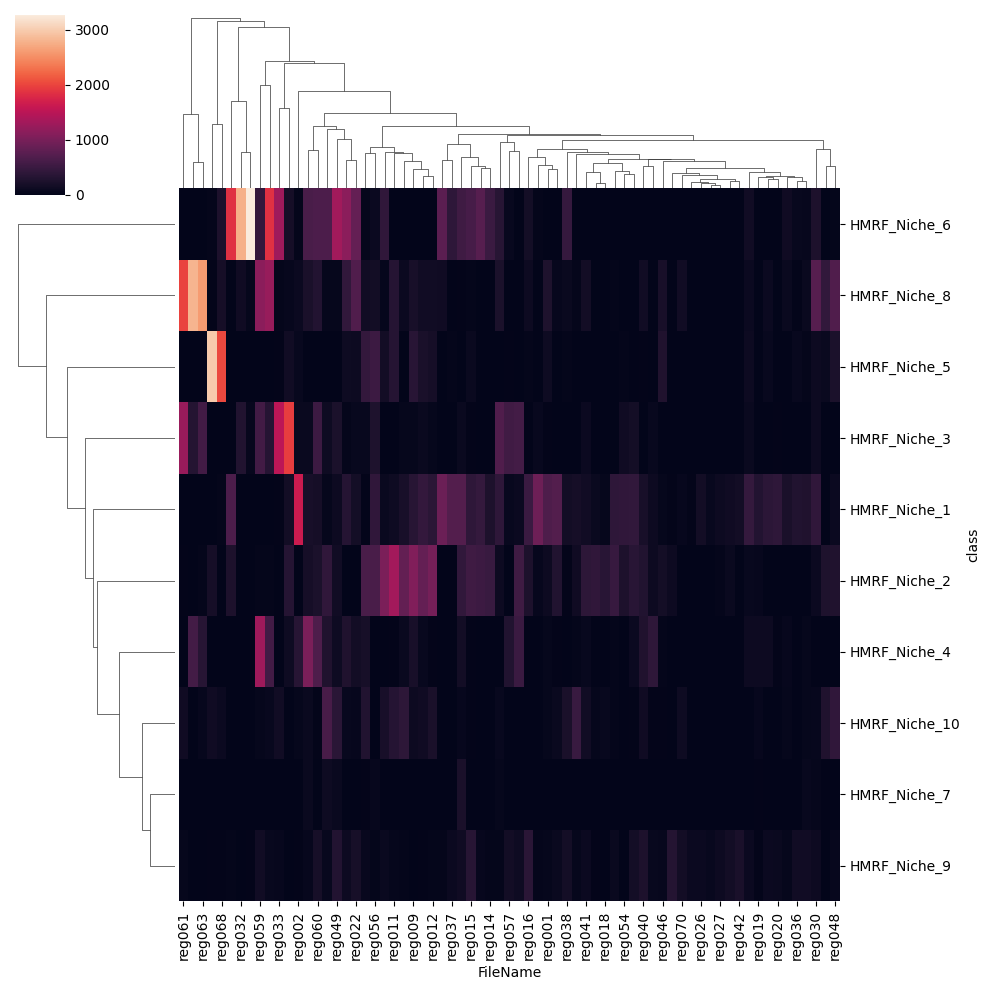

In [8]:
seaborn.clustermap(df_combined)

In [9]:
X = df_combined.T
X
clinical = pandas.read_csv('../../../Data/CODEX_CTCL/41467_2021_26974_MOESM3_ESM_-_Objects.csv',index_col=0).loc[:,['FileName','Groups','Patients']].reset_index()
Y = clinical[['FileName','Groups']].drop_duplicates()
Y.index = Y['FileName']
Y = Y['Groups']
idx = Y.index.isin(X.index)
Y = Y[idx]
Y.index.isin(X.index)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [10]:
len(Y)

69

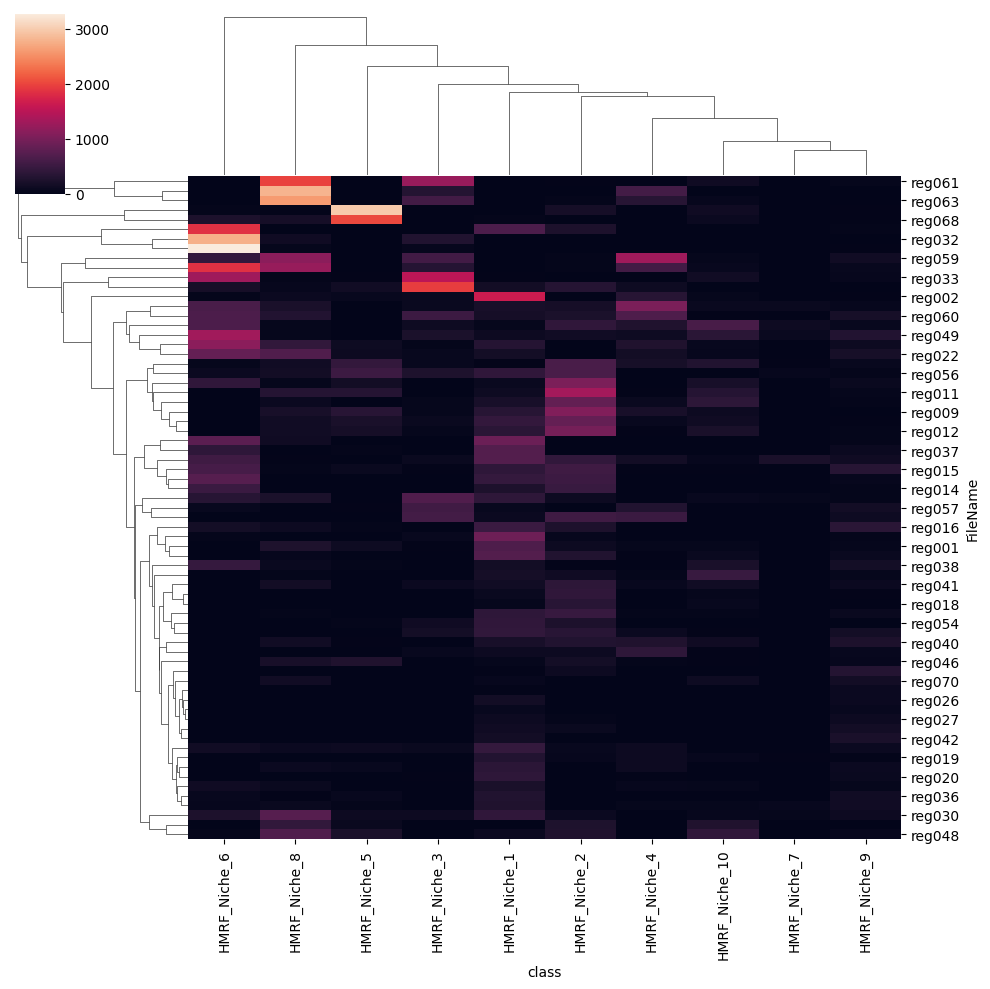

In [11]:
seaborn.clustermap(X)

# Machine learning model

/home/abdelmounim.essabbar/mambaforge/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/abdelmounim.essabbar/mambaforge/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/abdelmounim.essabbar/mambaforge/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was d

Cross-validated AUC scores: [0.57233796 0.63888889 0.6037037  0.80925926 0.64236111]
Average AUC Score: 0.6533101851851852 ± 0.08205519299969222


/home/abdelmounim.essabbar/mambaforge/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/abdelmounim.essabbar/mambaforge/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


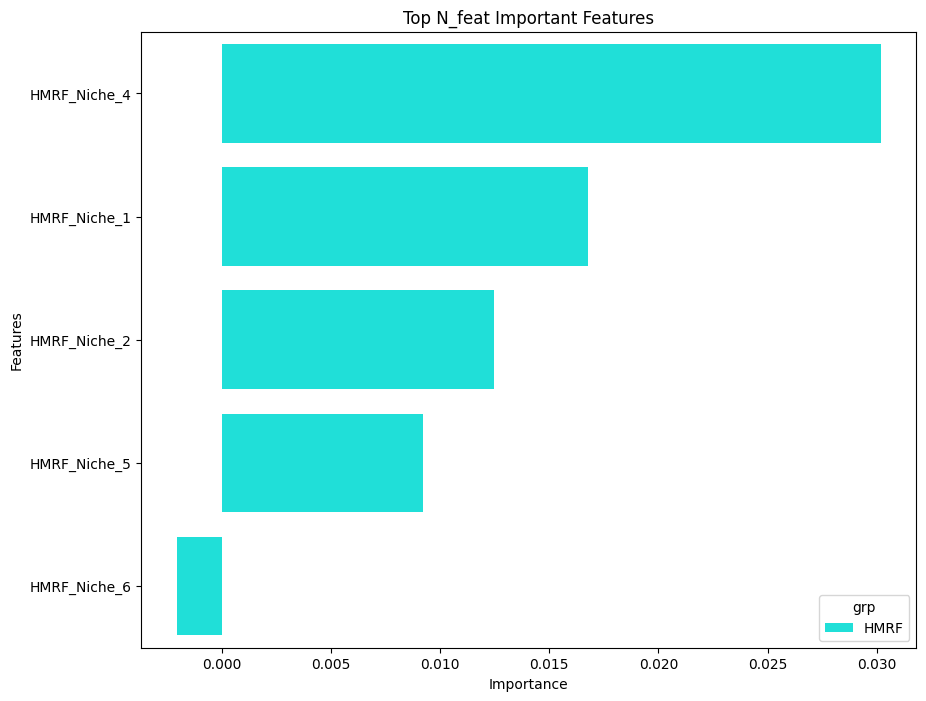

,Feature,Importance,grp
3,HMRF_Niche_4,0.030198,HMRF
0,HMRF_Niche_1,0.016758,HMRF
1,HMRF_Niche_2,0.012452,HMRF
4,HMRF_Niche_5,0.009219,HMRF
5,HMRF_Niche_6,-0.002074,HMRF


In [17]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model_with_features(X, Y, N_feat=5):
    # Setting up 5-fold stratified cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Creating the Logistic Regression model
    model = LogisticRegression(random_state=42, multi_class='ovr')


    # Performing cross-validation and computing the AUC scores for each fold
    cv_auc_scores = cross_val_score(model, X, Y, cv=cv, scoring='roc_auc_ovo')
    print(f"Cross-validated AUC scores: {cv_auc_scores}")
    print(f"Average AUC Score: {cv_auc_scores.mean()} ± {cv_auc_scores.std()}")


    # Splitting the dataset into training and testing sets for feature importance analysis
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
    model.fit(X_train, Y_train)

    # Getting feature coefficients (importances)
    feature_importances = model.coef_[0]

    # Creating a DataFrame to view the feature importances more easily
    features_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    })

    # Sorting the DataFrame based on feature importance and selecting the top N_feat
    sorted_features_df = features_df.sort_values(by='Importance', ascending=False).head(N_feat)

    # Plotting
    plt.figure(figsize=(10, 8))
    sorted_features_df['grp'] = sorted_features_df['Feature'].str[:4]
    sns.barplot(data=sorted_features_df, x='Importance', y='Feature', hue='grp', palette=sns.color_palette("hsv", len(sorted_features_df['grp'].unique())))
    plt.title('Top N_feat Important Features')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()

    return sorted_features_df

evaluate_model_with_features(X,Y)


/home/abdelmounim.essabbar/mambaforge/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/abdelmounim.essabbar/mambaforge/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/abdelmounim.essabbar/mambaforge/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/home/abdelmounim.essabbar/mambafor

Cross-validated AUC scores: [nan nan nan nan nan]
Average AUC Score: nan ± nan


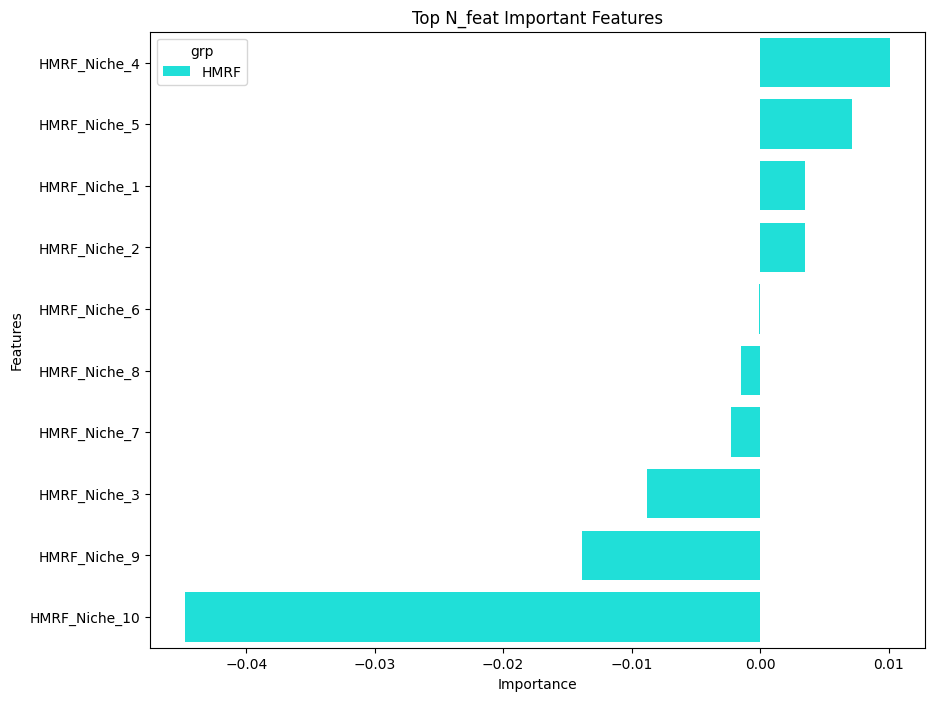

,Feature,Importance,grp
3,HMRF_Niche_4,0.010091,HMRF
4,HMRF_Niche_5,0.007151,HMRF
0,HMRF_Niche_1,0.003519,HMRF
1,HMRF_Niche_2,0.003506,HMRF
5,HMRF_Niche_6,-0.000076,HMRF
7,HMRF_Niche_8,-0.001492,HMRF
6,HMRF_Niche_7,-0.002286,HMRF
2,HMRF_Niche_3,-0.008809,HMRF
8,HMRF_Niche_9,-0.013863,HMRF
9,HMRF_Niche_10,-0.044740,HMRF
